### Problem Statement

Fit a 2 degree polynomial onto the given X and true Y, which is coming from equation Y = -2*X^2 - X + 2

In [38]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

#mpl.style.available
mpl.style.use('seaborn-v0_8-darkgrid')

In [39]:
# Setup the supervised data set

X = np.arange(-1, 1, 0.01)

# shuffle X
np.random.shuffle(X)

Y_actual = (-2*(X ** 2)) - X + 2

In [40]:
# Split the data set for training and testing
def split_dataset(X, Y, train_percent=70):
    
    idx = int((len(X)*train_percent)/100)
    
    X_train = X[:idx]
    Y_train = Y[:idx]
    X_test = X[idx:]
    Y_test = Y[idx:]

    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = split_dataset(X, Y_actual, train_percent=80)

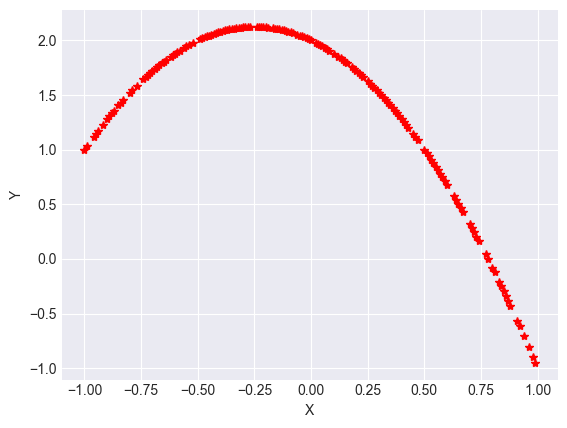

In [41]:
# plot graph for training data
plt.figure()
plt.plot(X_train, Y_train, "*", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

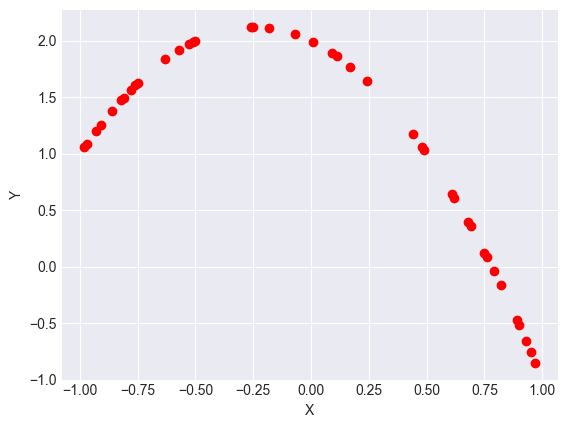

In [42]:
# plot graph for test data
plt.figure()
plt.plot(X_test, Y_test, "o", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [44]:
# used to get random values that need to be assigned to learnable parameters like theta0, theta1
def make_random_start(total_nums, seed=42):

    np.random.seed(seed)
    return np.random.rand(total_nums)

array([0.37454012, 0.95071431, 0.73199394])

In [45]:
# fetch the predicted value
def prediction(X, params):

    Y_pred = params[0] + (params[1] * X) + (params[2] * (X**2))
    return Y_pred

In [46]:
# train the model
def training(X, Y, lr=0.1, epochs=1000):
    
    params = make_random_start(3)
    cost_per_epoch = []

    for _ in range(epochs):

        cost = 0
        dJ_dtheta0, dJ_dtheta1, dJ_dtheta2 = 0, 0, 0

        for i in range(len(X)):

            y_pred = prediction(X[i], params)
            error = y_pred - Y[i]
            cost = cost + (error ** 2)
            dJ_dtheta0 = dJ_dtheta0 + error
            dJ_dtheta1 = dJ_dtheta1 + (error * X[i])
            dJ_dtheta2 = dJ_dtheta2 + (error * (X[i] ** 2))

        # average cost
        cost = cost/len(X)
        cost_per_epoch.append(cost)

        # update parameters
        params[0] = params[0] - (2 * lr * dJ_dtheta0) / len(X)
        params[1] = params[1] - (2 * lr * dJ_dtheta1) / len(X)
        params[2] = params[2] - (2 * lr * dJ_dtheta2) / len(X)
    
    return params, cost_per_epoch

In [47]:
params, cost_per_epoch = training(X_train, Y_train)

In [48]:
params

array([ 1.99999971, -0.99999999, -1.99999911])

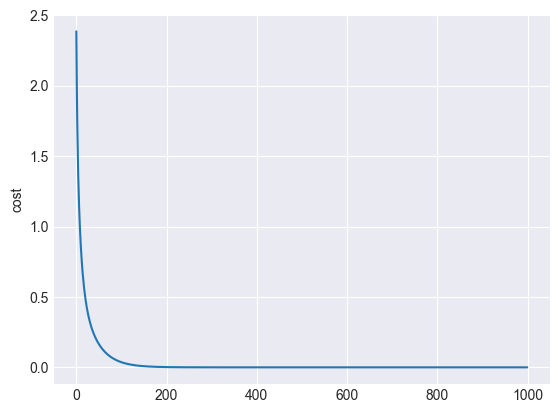

In [49]:
plt.figure()
plt.plot(cost_per_epoch)
plt.ylabel("cost")
plt.show()

[ 1.99999968 -0.99999998 -1.99999901]


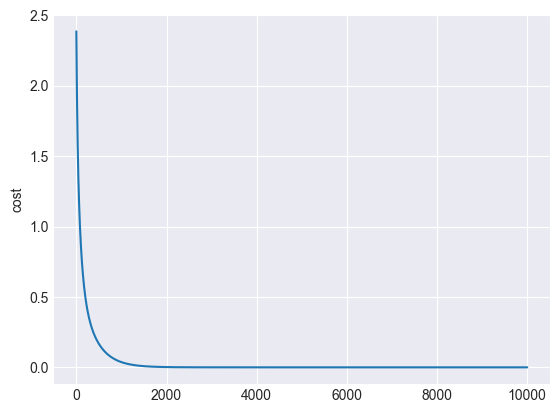

In [52]:
params, cost_per_epoch = training(X_train, Y_train, lr=0.01, epochs=10000)
print(params)
plt.figure()
plt.plot(cost_per_epoch)
plt.ylabel("cost")
plt.show()

In [58]:
# training with early stopping
def training_with_early_stopping(X, Y, lr=0.1, epochs=1000, patience=5, tolerance=1e-6):

    params = make_random_start(3)
    cost_per_epoch = []

    # initialize variables to track param changes
    unchanged_count = 0 # counter for consecutive unchanged params
    prev_params = params.copy() # store prev params for comparison

    for _ in range(epochs):

        cost = 0
        dJ_dtheta0, dJ_dtheta1, dJ_dtheta2 = 0, 0, 0

        for i in range(len(X)):

            y_pred = prediction(X[i], params)
            error = y_pred - Y[i]
            cost += (error ** 2)
            dJ_dtheta0 += error
            dJ_dtheta1 += (error * X[i])
            dJ_dtheta2 += (error * (X[i] ** 2))

        # average cost
        cost /= len(X)
        cost_per_epoch.append(cost)

        # update params
        params[0] -= (2 * lr * dJ_dtheta0) / len(X)
        params[1] -= (2 * lr * dJ_dtheta1) / len(X)
        params[2] -= (2 * lr * dJ_dtheta2) / len(X)

        # check if parameters have changed
        if all(abs(params[i] - prev_params[i]) < tolerance for i in range(3)):
            unchanged_count += 1
        else:
            unchanged_count = 0 # reset if parameters changed
        
        # update prev parameters
        prev_params = params.copy()

        # early stopping condition
        # >= is safeguard condition
        # in practice unchanged_count will not exceed patience
        if unchanged_count >= patience:
            break

    return params, cost_per_epoch

[ 1.99997984 -0.99999902 -1.99993824]


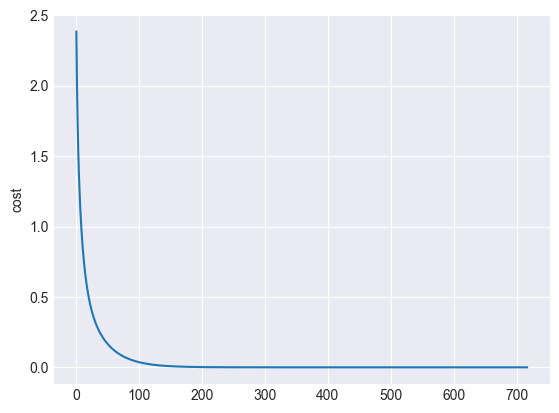

In [59]:
params, cost_per_epoch = training_with_early_stopping(X_train, Y_train)
print(params)
plt.figure()
plt.plot(cost_per_epoch)
plt.ylabel("cost")
plt.show()

[ 1.99978274 -0.99998945 -1.99933457] 5635


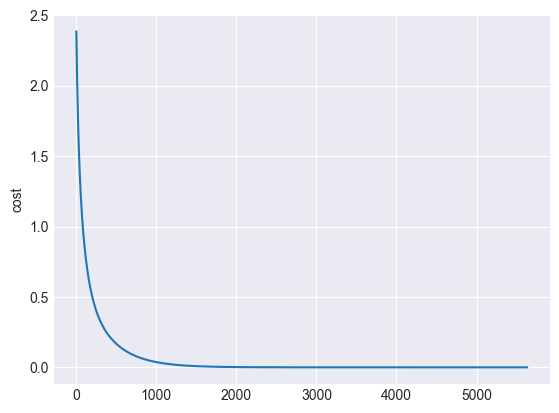

In [57]:
params, cost_per_epoch = training_with_early_stopping(X_train, Y_train, lr=0.01, epochs=10000)
print(params, len(cost_per_epoch))
plt.figure()
plt.plot(cost_per_epoch)
plt.ylabel("cost")
plt.show()